
## Cartoon Methods

In prior examples the grid sizes for metrics have had depth in X, Y, and Z. For metrics that contain symmetry, or if you are just interested in computing a 2D or 1D slice of a metric, then cartoon methods are for you.

### 2D Cartoon

For 2D evaluations, one of the spatial slices has been set to the thickness of 5. 5 grid points is the minimum number of points needed to take accurate using forth order finite differencing. The computed energy tensor will only be accurate at the center grid point of the slice. (If using second order, the minimum thickness is 3).


Inline plot failed, consider trying another graphics toolkit
error: print: no axes object in figure to print
error: called from
    _make_figures>safe_print at line 125 column 7
    _make_figures at line 49 column 13



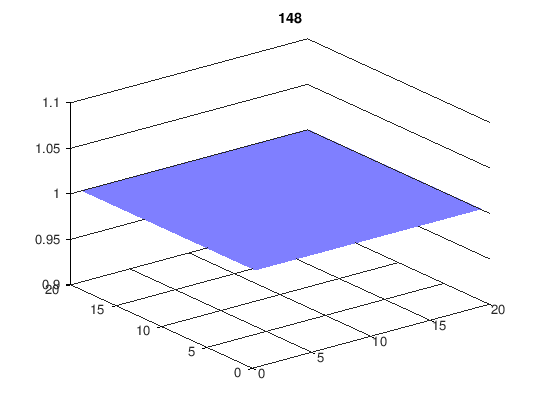

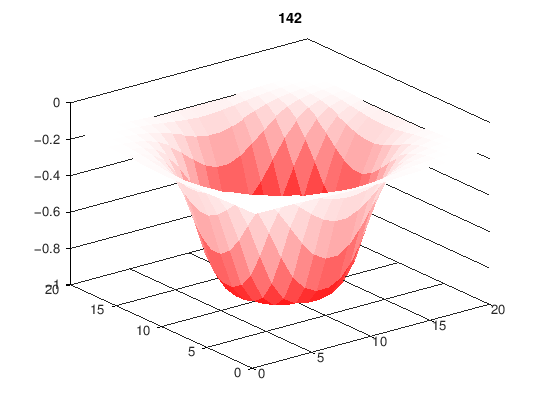

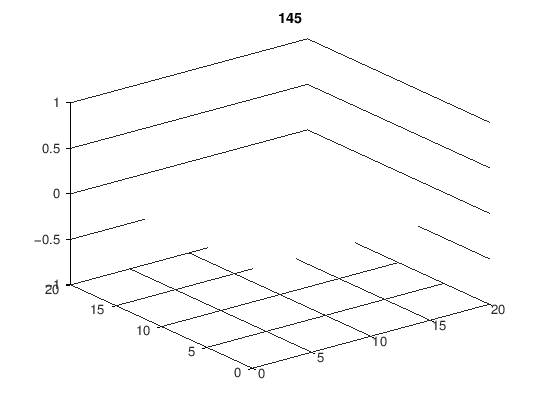

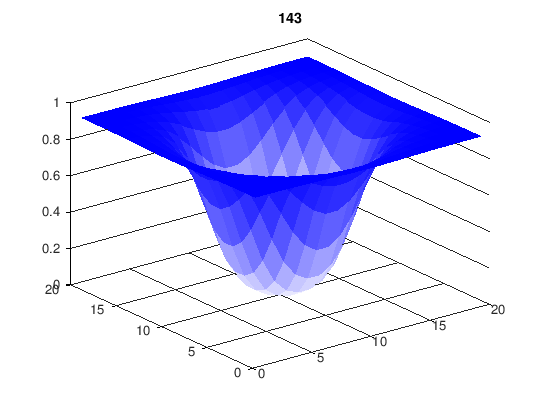

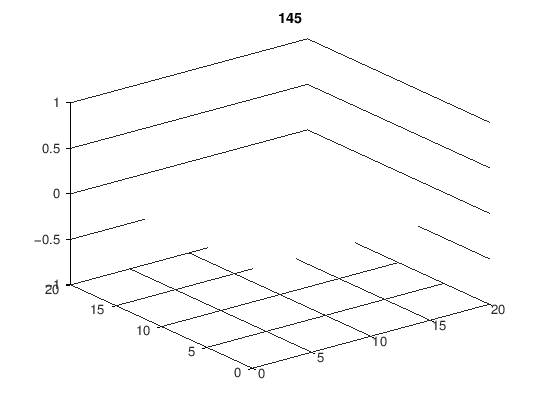

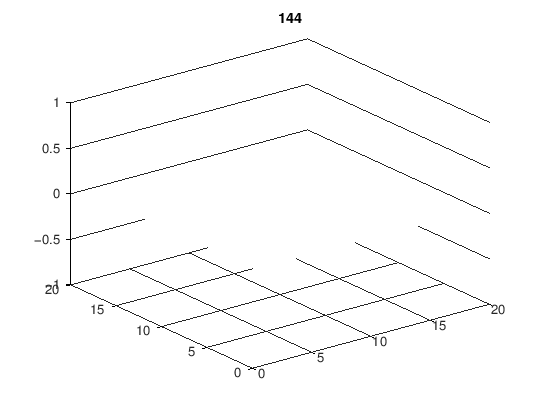

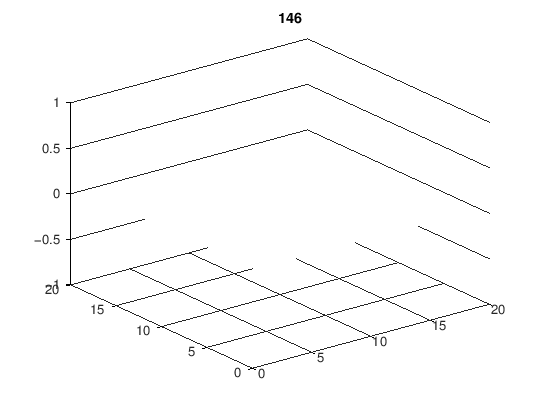

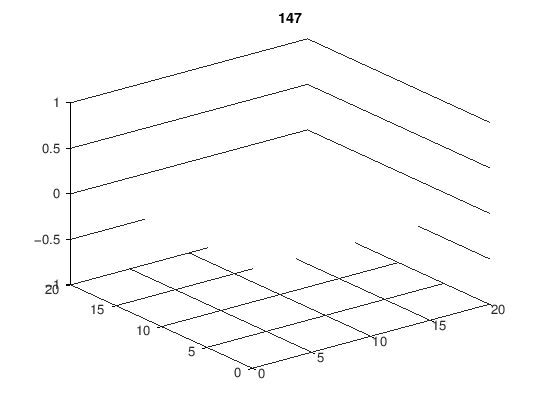

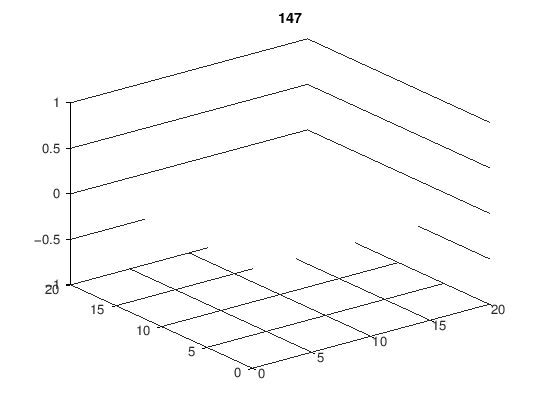

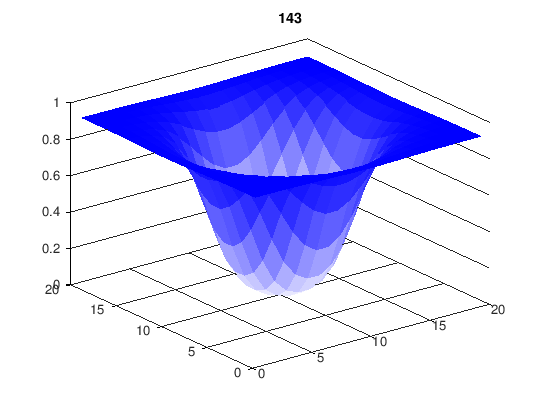

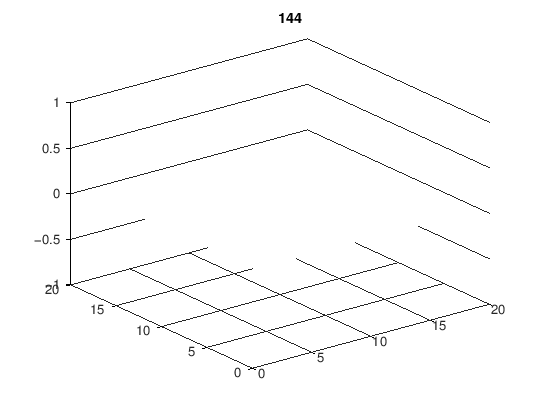

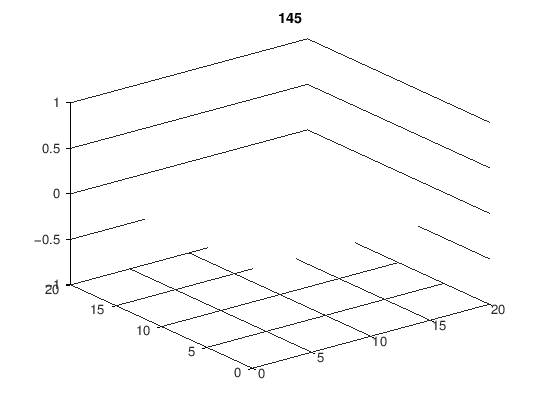

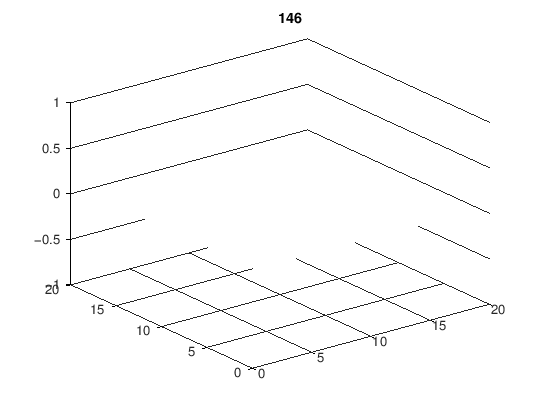

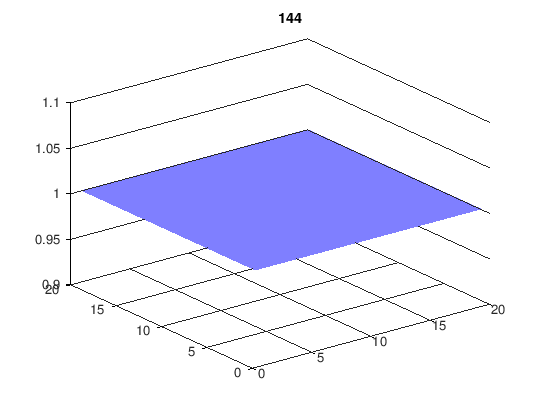

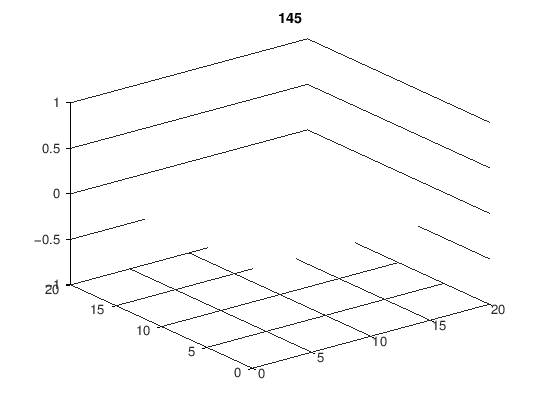

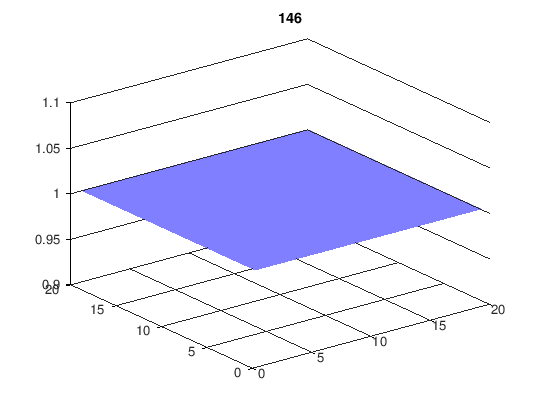

In [1]:
%% Alcubierre Cartoon Example
gridSize = [1 20 20 5]; % Z thickness of 5 grid points
worldCenter = (gridSize+1)./2;
velocity = 0.9;
R = 5;
sigma = 0.5;
Metric = metricGet_AlcubierreComoving(gridSize,worldCenter,velocity,R,sigma);

% Compute energy tensor
EnergyTensor = getEnergyTensor(Metric);

% Plotting Metric
clf
for i = 1:4
    for j = 1:4
        h = nexttile;
        surfq(Metric.tensor{i,j}(1,:,:,round(worldCenter(4))),'EdgeColor','none')
        title(num2str(i) + "," + num2str(j))
    end
end
sgtitle(Metric.name)

error: operator +: nonconformant arguments (op1 is 1x19, op2 is 1x14)


Inline plot failed, consider trying another graphics toolkit
error: print: no axes object in figure to print
error: called from
    _make_figures>safe_print at line 125 column 7
    _make_figures at line 49 column 13



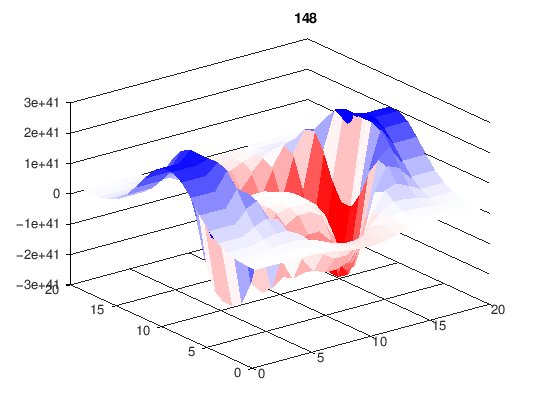

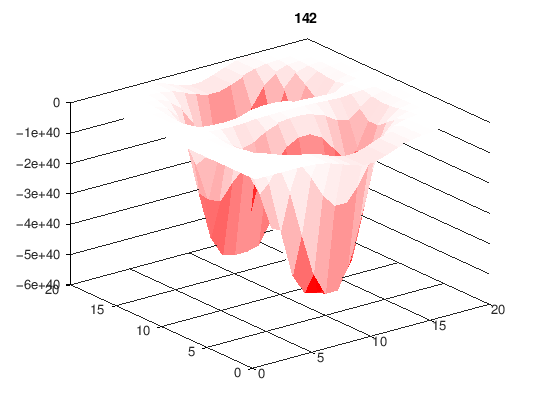

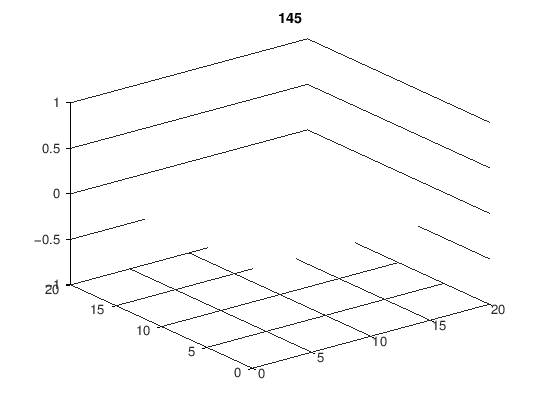

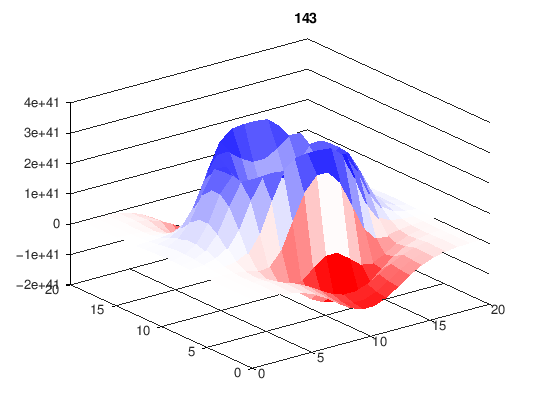

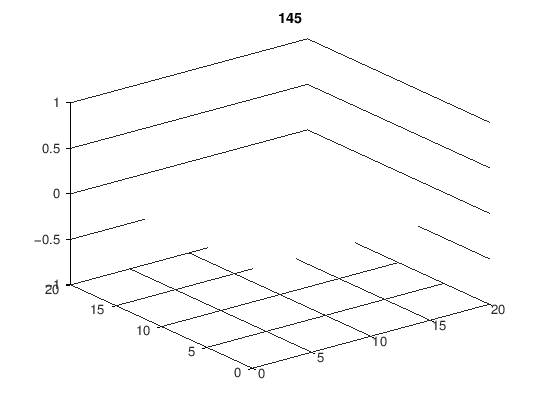

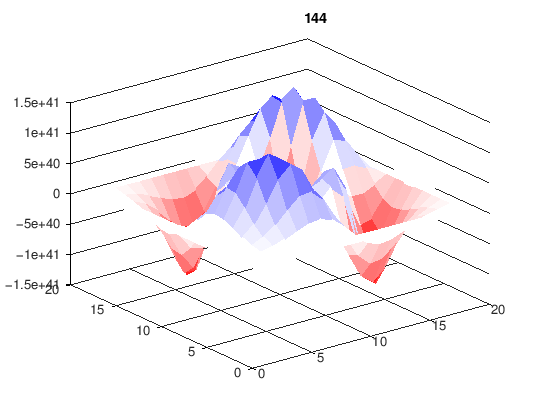

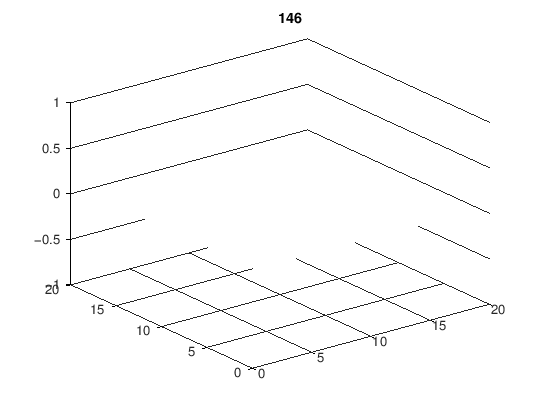

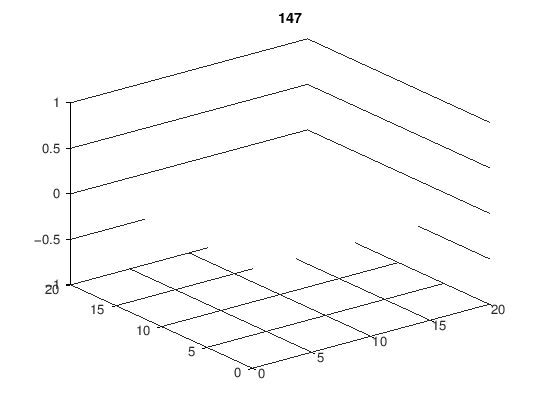

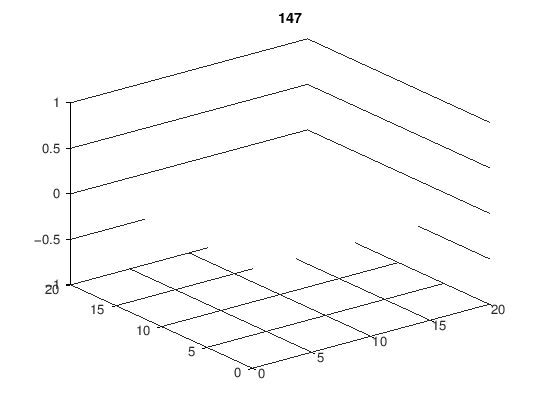

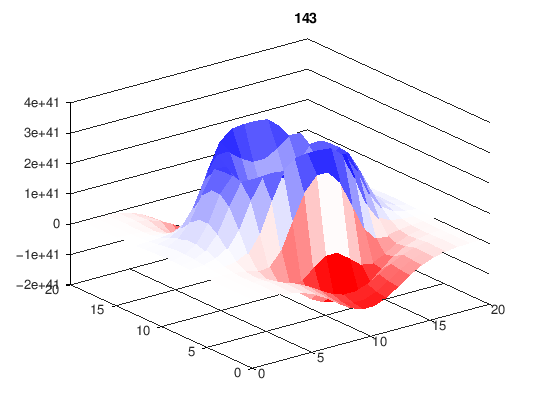

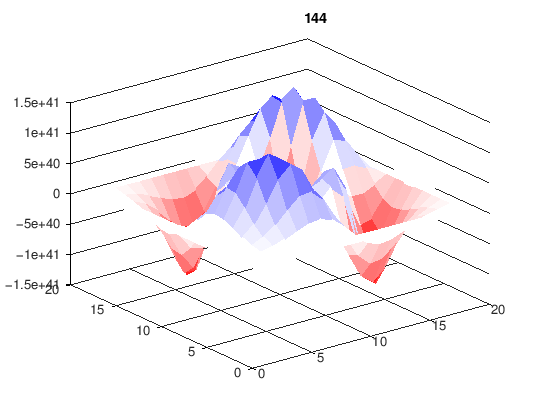

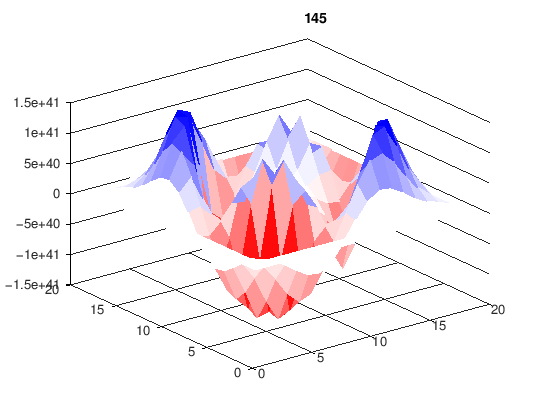

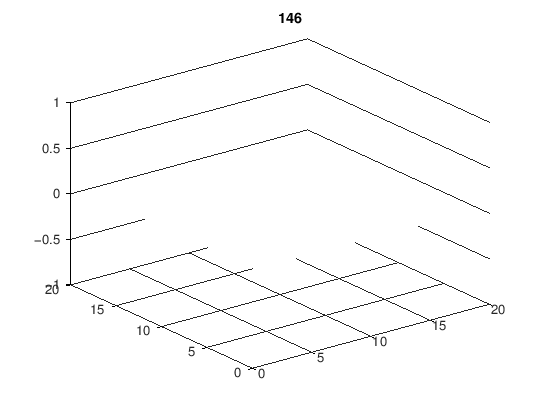

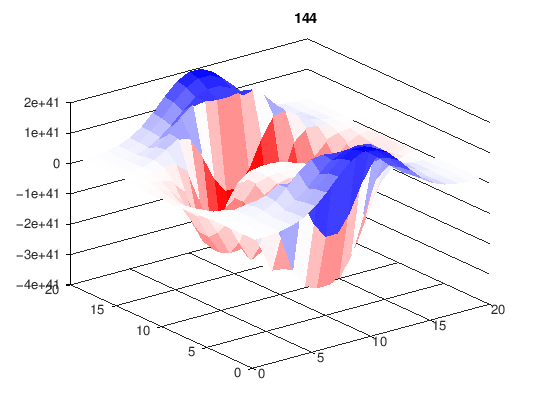

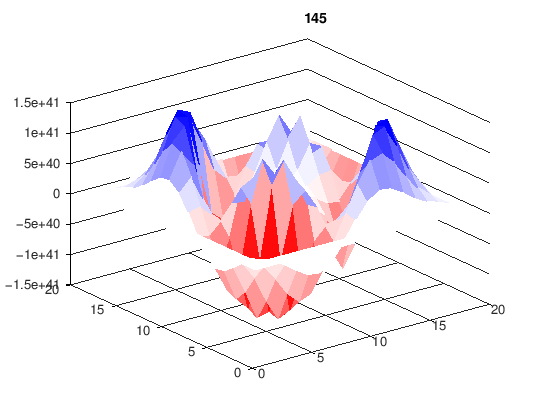

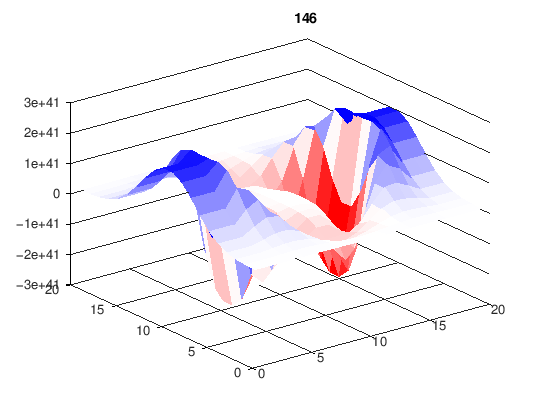

In [2]:

% Plotting Energy Tensor
clf
for i = 1:4
    for j = 1:4
        h = nexttile;
        surfq(EnergyTensor.tensor{i,j}(1,:,:,round(worldCenter(4))),'EdgeColor','none')
        title(num2str(i) + "," + num2str(j))
    end
end
sgtitle(Metric.name + " Energy Tensor")

#### Large World Size

This slicing of the world can be used to compute much larger grid sizes without the prohibitive scaling of 3D space.


For example, here we evaluate a much larger 2D grid size than any example beforehand.


Inline plot failed, consider trying another graphics toolkit
error: print: no axes object in figure to print
error: called from
    _make_figures>safe_print at line 125 column 7
    _make_figures at line 49 column 13



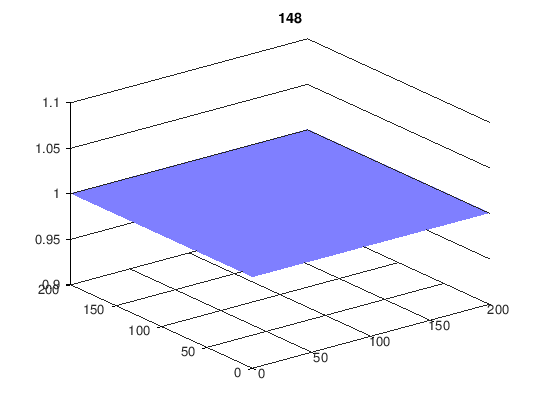

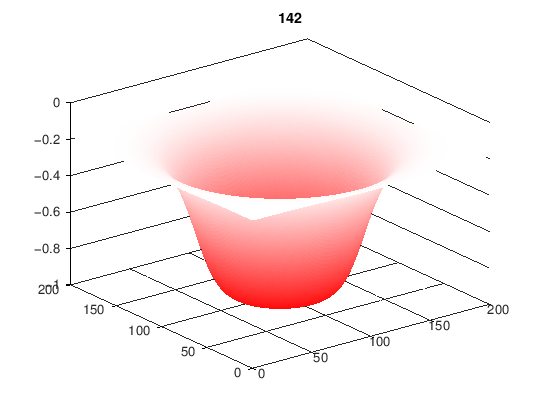

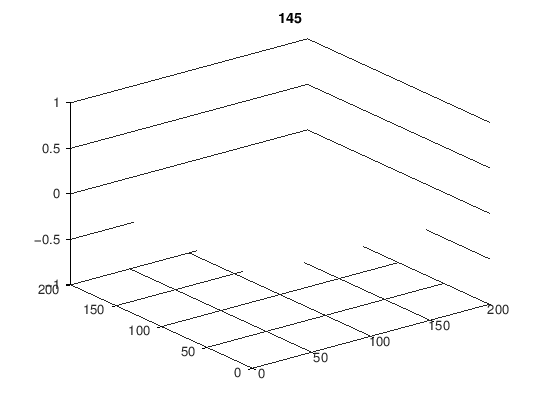

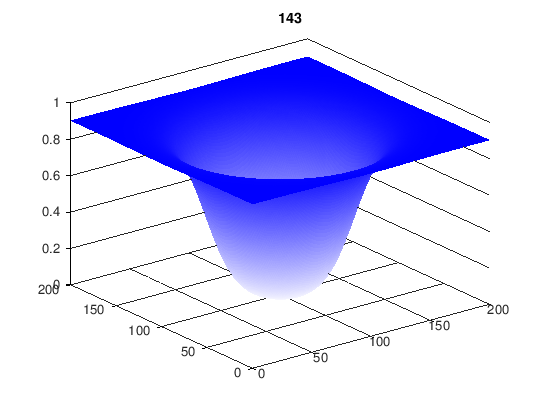

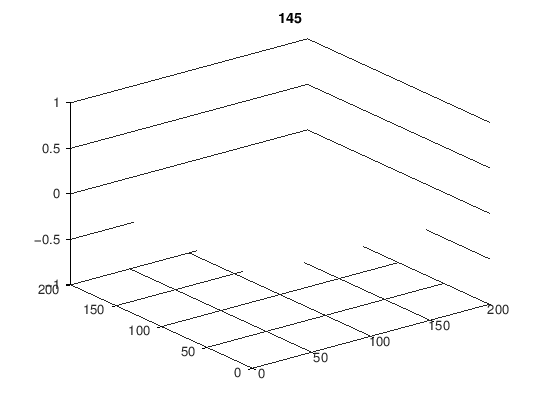

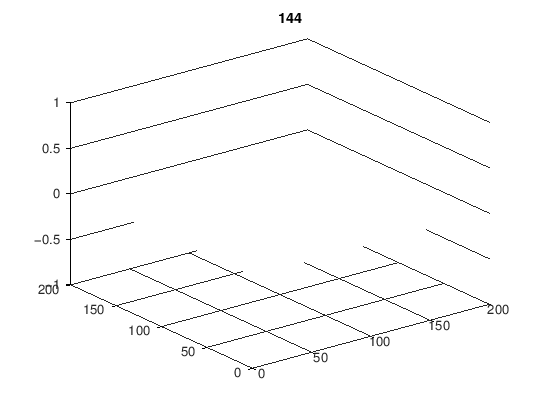

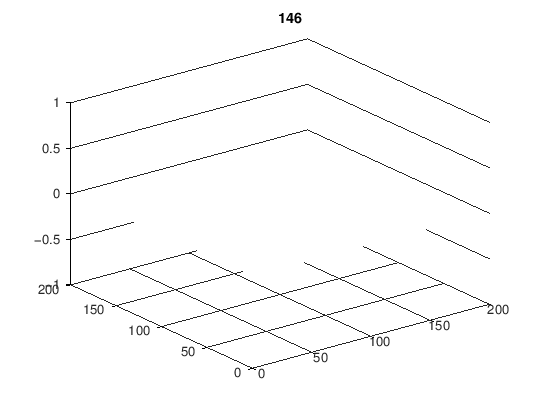

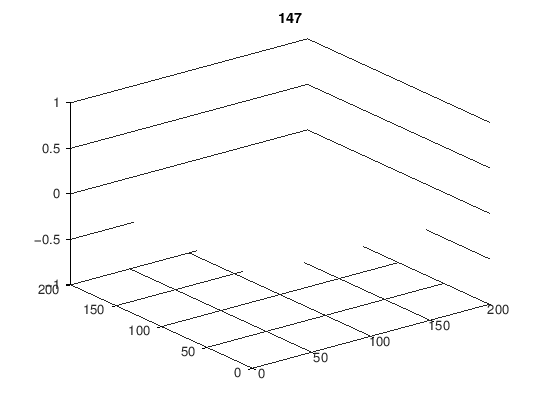

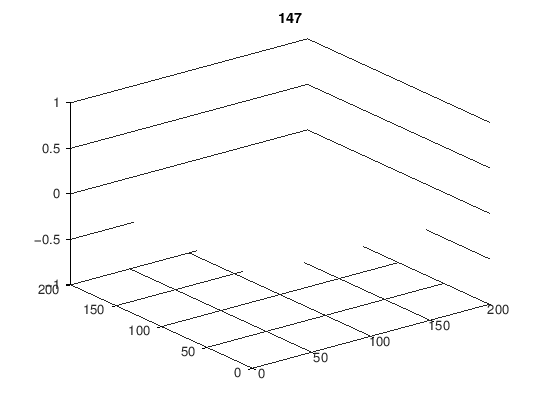

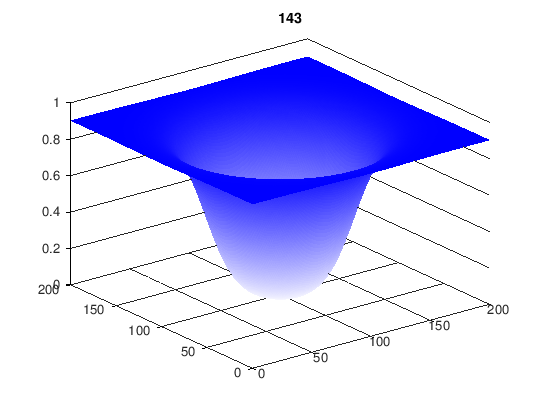

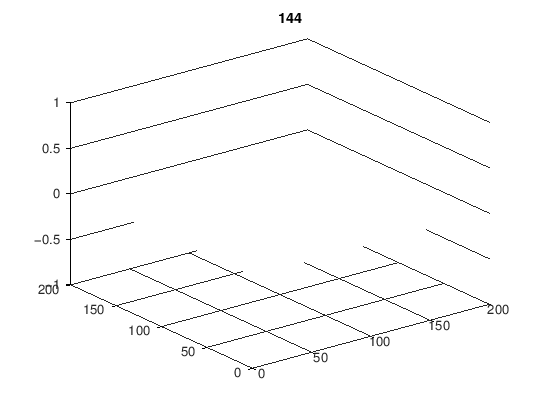

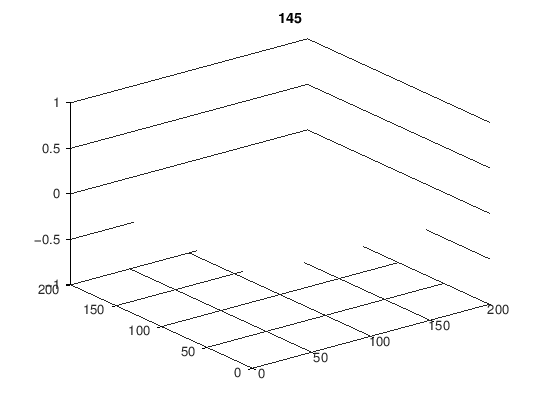

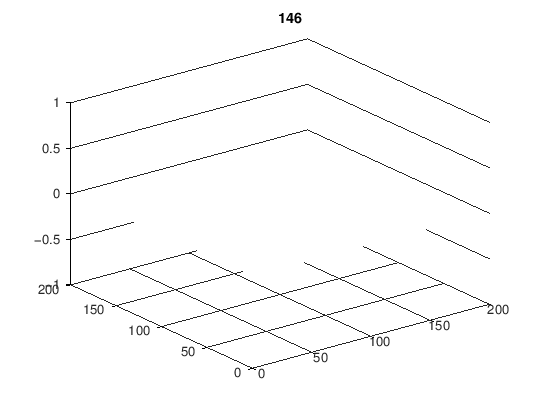

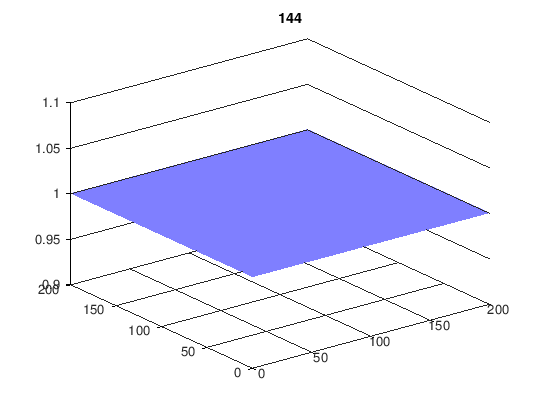

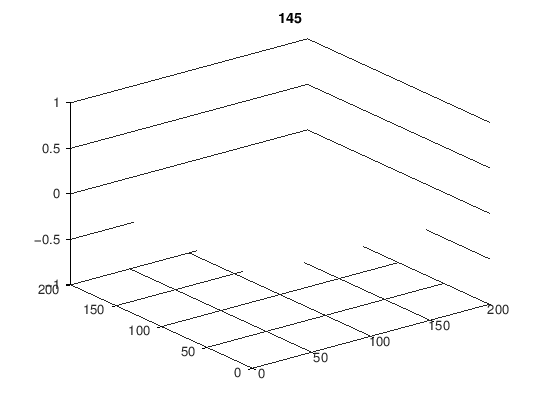

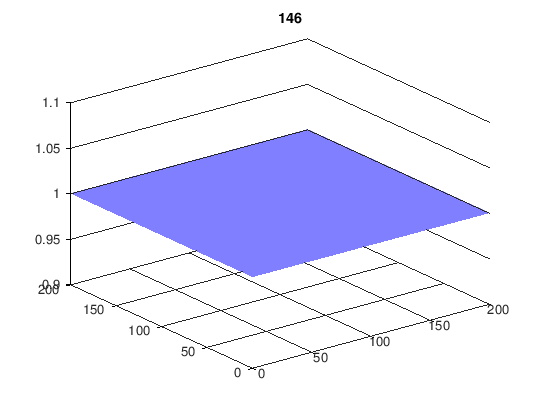

In [3]:
%% Alcubierre Large World Size Example
gridSize = [1 200 200 5]; % Z thickness of 5 grid points
worldCenter = (gridSize+1)./2;
velocity = 0.9;
R = 50;
sigma = 0.05;
Metric = metricGet_AlcubierreComoving(gridSize,worldCenter,velocity,R,sigma);

% Compute energy tensor
EnergyTensor = getEnergyTensor(Metric);

% Plotting Metric
clf
for i = 1:4
    for j = 1:4
        h = nexttile;
        surfq(Metric.tensor{i,j}(1,:,:,round(worldCenter(4))),'EdgeColor','none')
        title(num2str(i) + "," + num2str(j))
    end
end
sgtitle(Metric.name)

Inline plot failed, consider trying another graphics toolkit
error: print: no axes object in figure to print
error: called from
    _make_figures>safe_print at line 125 column 7
    _make_figures at line 49 column 13



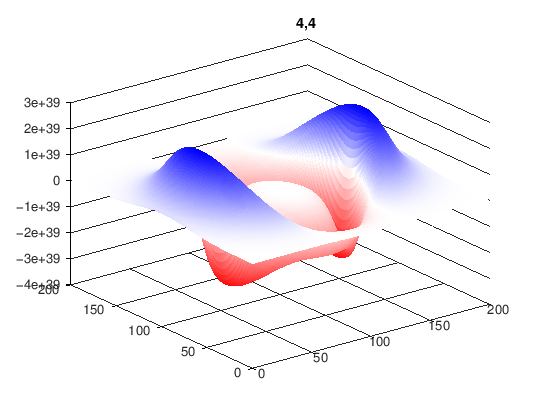

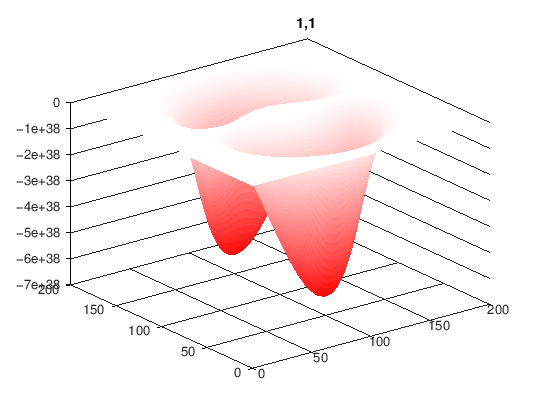

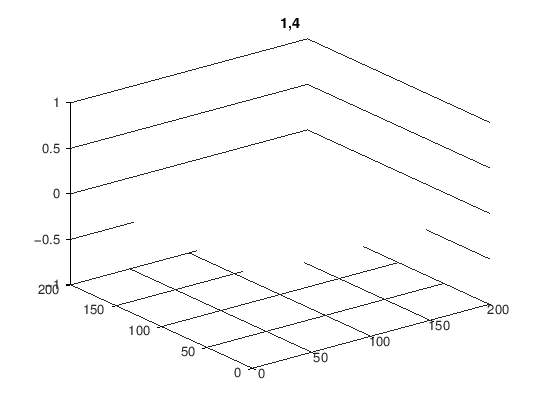

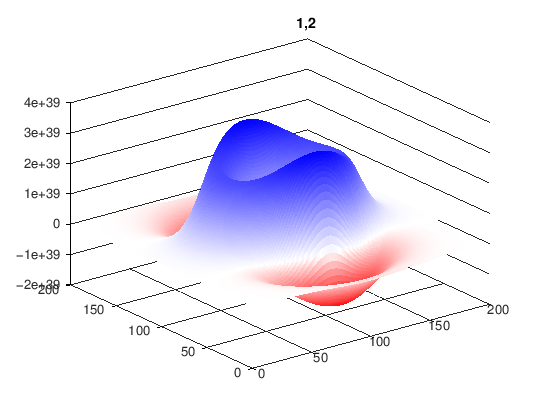

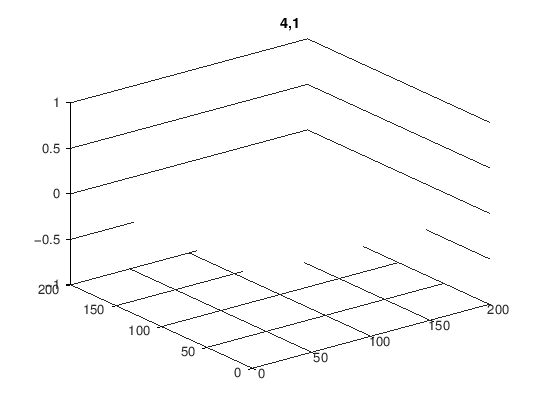

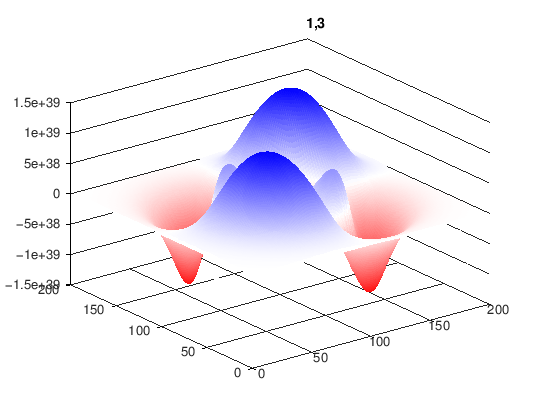

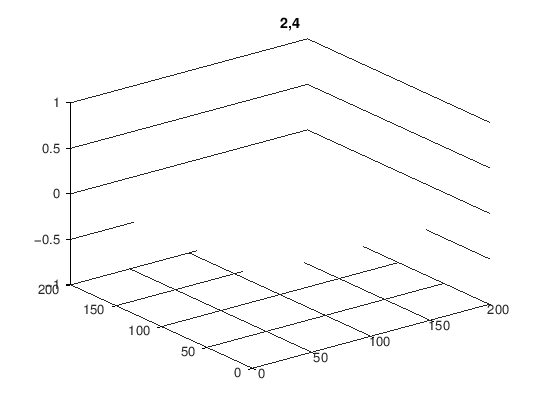

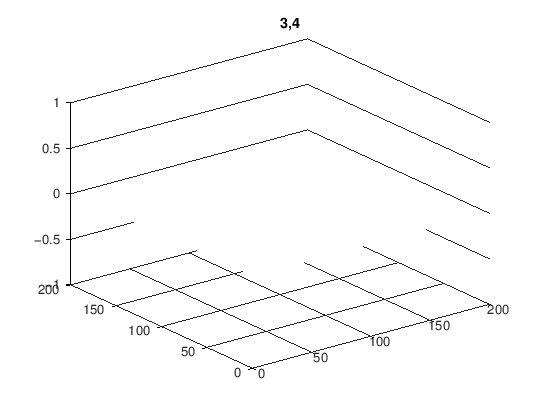

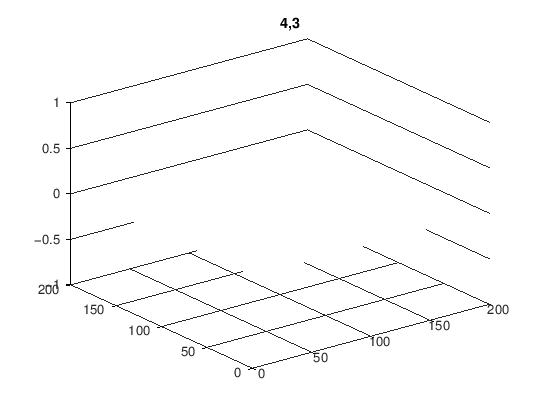

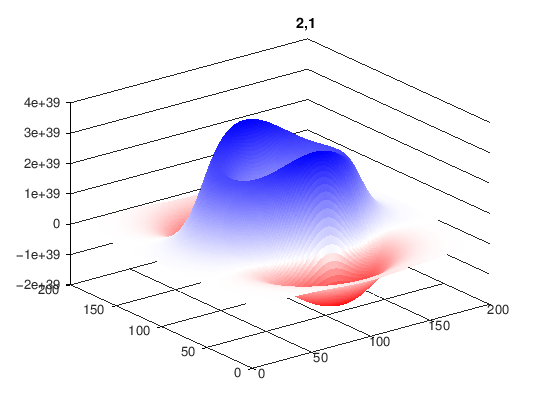

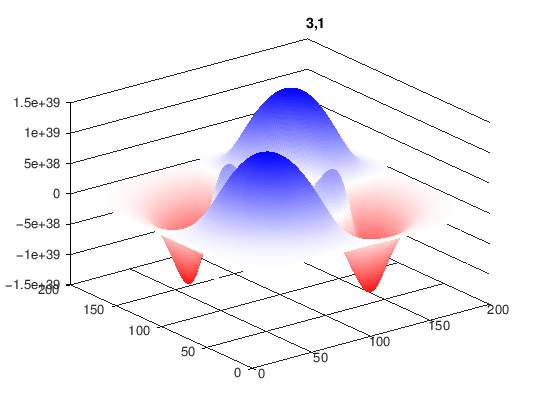

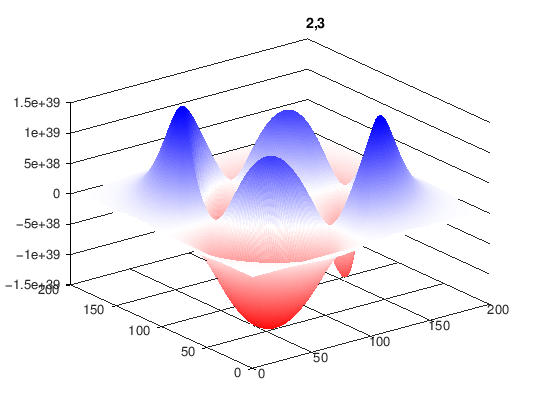

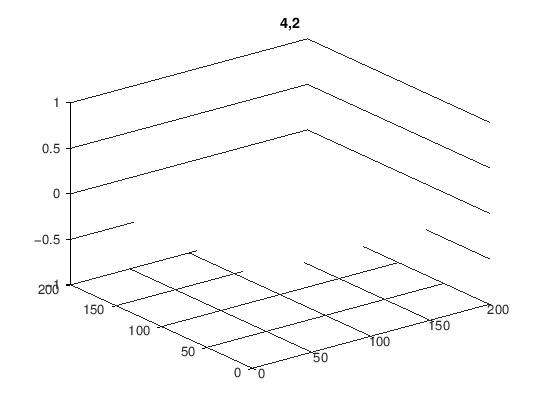

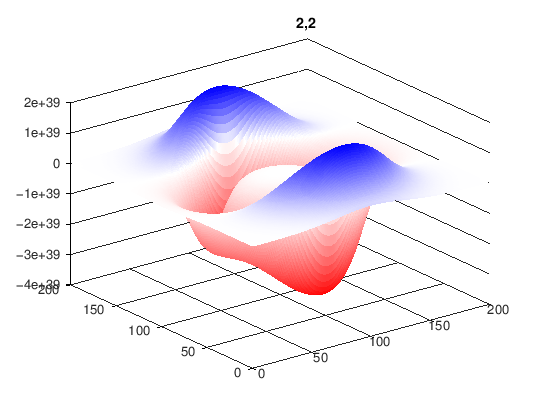

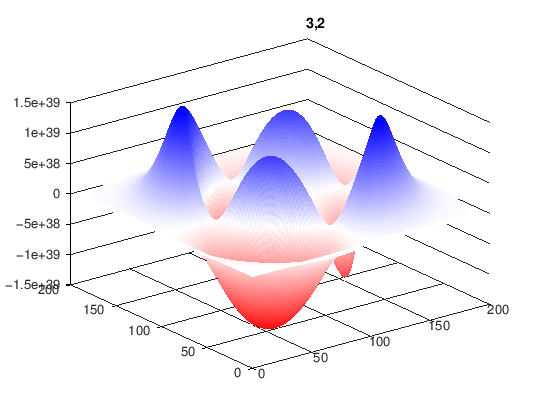

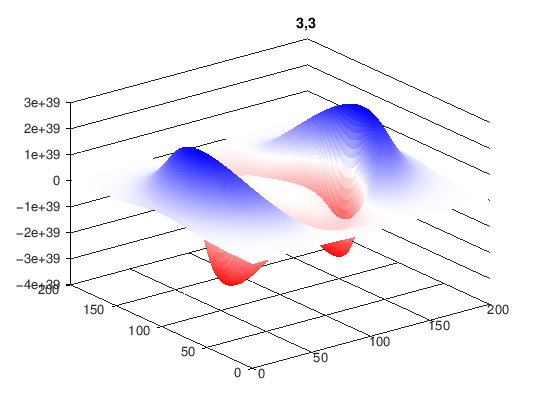

In [5]:

% Plotting Energy Tensor
clf
for i = 1:4
    for j = 1:4
        h = nexttile;
        surfq(EnergyTensor.tensor{i,j}(1,:,:,round(worldCenter(4))),'EdgeColor','none')
        title([num2str(i)  ","  num2str(j)])
    end
end
% sgtitle(Metric.name + " Energy Tensor")


#### High Resolution Grids

In addition to larger world sizes, higher resolutions can also be run by changing the gridScaling property.



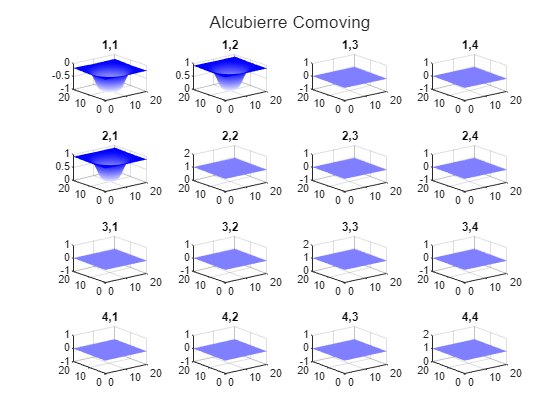

In [5]:
%% Alcubierre Hi Res Example
gridSize = [1 200 200 5]; % Z thickness of 5 grid points
gridScaling = [1 0.1 0.1 0.1]; % Define hi-res grid scaling of 10 grid points per meter
worldCenter = (gridSize+1)./2.*gridScaling; % World center is defined in real-world position, not grid points
velocity = 0.9;
R = 5;
sigma = 0.5;
Metric = metricGet_AlcubierreComoving(gridSize,worldCenter,velocity,R,sigma,gridScaling);

% Compute energy tensor
EnergyTensor = getEnergyTensor(Metric);

% Plotting Metric
clf
for i = 1:4
    for j = 1:4
        h = nexttile;
        surfq((1:gridSize(2)).*gridScaling(2),(1:gridSize(3)).*gridScaling(3),Metric.tensor{i,j}(1,:,:,round(worldCenter(4)/gridScaling(4))),'EdgeColor','none')
        title(num2str(i) + "," + num2str(j))
    end
end
sgtitle(Metric.name)


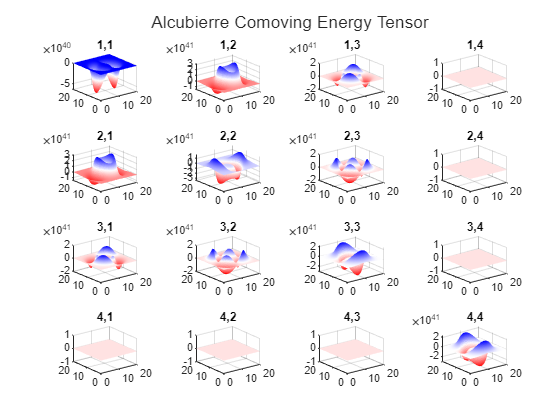

In [6]:

% Plotting Energy Tensor
clf
for i = 1:4
    for j = 1:4
        h = nexttile;
        surfq((1:gridSize(2)).*gridScaling(2),(1:gridSize(3)).*gridScaling(3),EnergyTensor.tensor{i,j}(1,:,:,round(worldCenter(4)/gridScaling(4))),'EdgeColor','none')
        title(num2str(i) + "," + num2str(j))
    end
end
sgtitle(Metric.name + " Energy Tensor")

### 1D Cartoon

Taking this down another dimension, we can just compute a 1D slice of the metric.



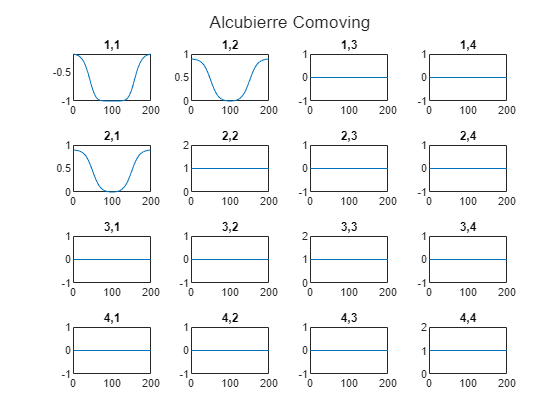

In [7]:
%% Alcubierre
gridSize = [1 5 200 5]; % X and Z thickness of 5 grid points
worldCenter = (gridSize+1)./2;
velocity = 0.9;
R = 50;
sigma = 0.05;
Metric = metricGet_AlcubierreComoving(gridSize,worldCenter,velocity,R,sigma);

% Compute energy tensor
EnergyTensor = getEnergyTensor(Metric);

% Plotting Metric
clf
for i = 1:4
    for j = 1:4
        h = nexttile;
        plotq(Metric.tensor{i,j}(1,round(worldCenter(2)),:,round(worldCenter(4))))
        title(num2str(i) + "," + num2str(j))
    end
end
sgtitle(Metric.name)


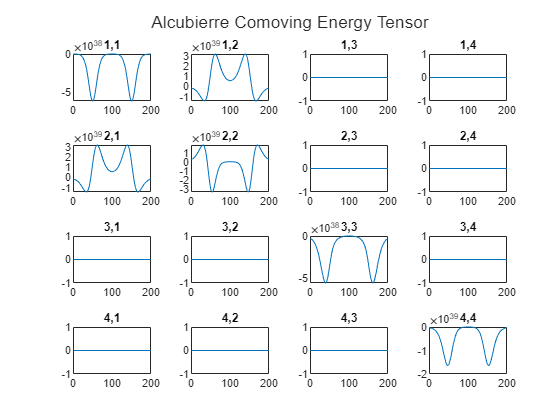

In [8]:

% Plotting Energy Tensor
clf
for i = 1:4
    for j = 1:4
        h = nexttile;
        plotq(EnergyTensor.tensor{i,j}(1,round(worldCenter(2)),:,round(worldCenter(4))))
        title(num2str(i) + "," + num2str(j))
    end
end
sgtitle(Metric.name + " Energy Tensor")

### Symmetry and Special Considerations

If your metric has no derivatives in a certain direction, that direction's thickness can be set to a size of 1 or 2. We have already been doing this with the time direction of the comoving metrics since they do not evolve over time. For trailing dimensions, like the Z dimension, the thickness must be set to 2 instead of 1 to prevent MATLAB from automatically squeezing the 4D array into a 3D array.

